To analyze the long-term relationship between vegetation cover (Leaf Area Index) and land surface temperature in India and China using time-series data, and to determine whether changes in vegetation significantly influence surface temperature trends.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

**Read the dataset**

In [2]:
dataset = pd.read_csv(r'Countries_LAI_and_LST.csv', encoding='unicode_escape')
df = dataset[['Year', 'LAI_China', 'LST_China', 'LAI_India', 'LST_India']]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       16 non-null     int64  
 1   LAI_China  16 non-null     float64
 2   LST_China  16 non-null     float64
 3   LAI_India  16 non-null     float64
 4   LST_India  16 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 772.0 bytes


In [4]:
df.head()

,Year,LAI_China,LST_China,LAI_India,LST_India
0,2003,0.80,293.09,0.91,307.46
1,2004,0.82,293.77,0.94,307.42
2,2005,0.79,293.12,0.94,307.53
3,2006,0.83,293.67,0.97,307.33
4,2007,0.84,293.92,0.97,307.26


Get Descriptive Statistics

In [5]:
df.describe() #describe the central tendancy, dispersion, and shape of dataset's distribution, excluding Non values

,Year,LAI_China,LST_China,LAI_India,LST_India
count,16.000000,16.000000,16.000000,16.000000,16.00000
mean,2010.500000,0.863125,293.361875,0.985625,307.17625
std,4.760952,0.050559,0.366555,0.045162,0.35605
min,2003.000000,0.790000,292.470000,0.910000,306.72000
25%,2006.750000,0.827500,293.112500,0.960000,306.83500
50%,2010.500000,0.850000,293.445000,0.970000,307.16500
75%,2014.250000,0.905000,293.587500,1.010000,307.43000
max,2018.000000,0.950000,293.920000,1.070000,307.84000


In [6]:
df.shape #to return a number of rows and columns in a dataset

(16, 5)

**Check the number of null values**

In [7]:
df.isnull().sum()

Year         0
LAI_China    0
LST_China    0
LAI_India    0
LST_India    0
dtype: int64

**Handling Missing Values**

In [9]:
# cols = ['Year', 'LAI_China', 'LST_China', 'LAI_India', 'LST_India']

In [11]:
#Incase we have missing data...
#invoking simplerImputer to fill missing values

# imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
# df[cols] = imputer.fit_transform(df[cols])
# df.head()

,Year,LAI_China,LST_China,LAI_India,LST_India
0,2003.0,0.80,293.09,0.91,307.46
1,2004.0,0.82,293.77,0.94,307.42
2,2005.0,0.79,293.12,0.94,307.53
3,2006.0,0.83,293.67,0.97,307.33
4,2007.0,0.84,293.92,0.97,307.26


**Display the data as a pairplot**

C:\Users\ayush\anaconda3\envs\GIS\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


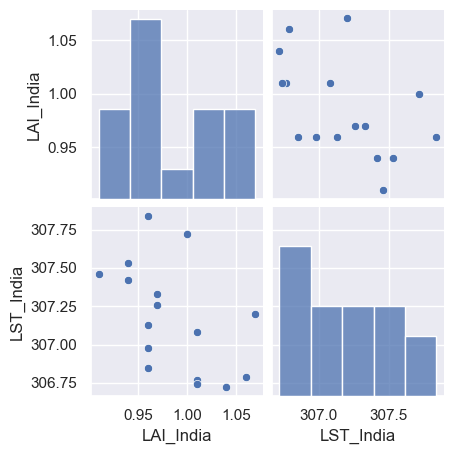

In [18]:
sns.set()
cols = ['LAI_India', 'LST_India']
sns.pairplot(df[cols], size=2.3)

**Create a heatmap:**

<Axes: >

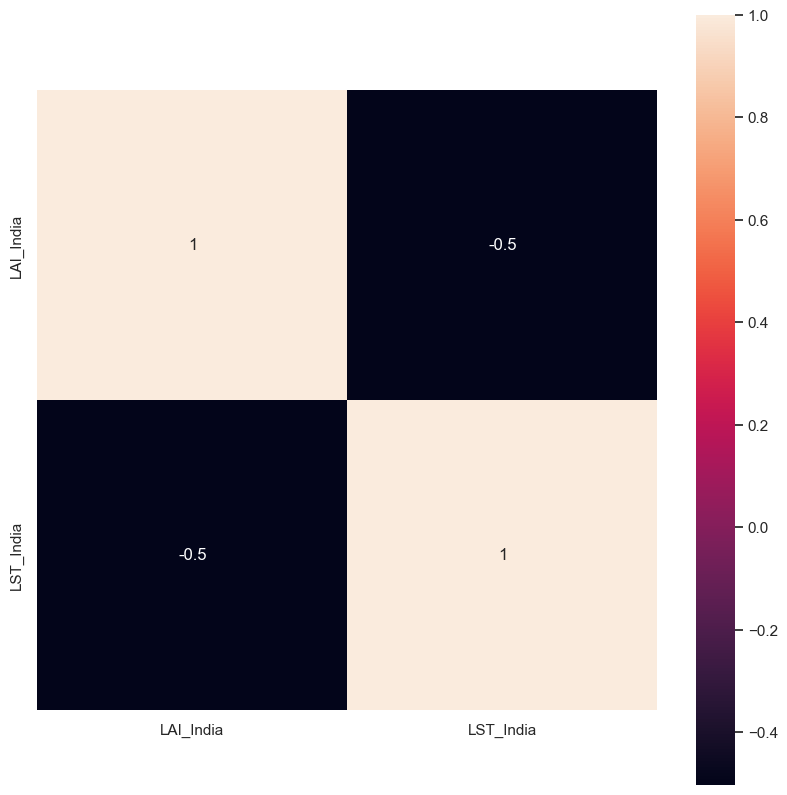

In [20]:
corrmat=df[cols].corr()
f, ax=plt.subplots(figsize= (10, 10))
sns.heatmap(corrmat,vmax = 1,square = True, annot = True)

**Create a barplot for LAI in India:**

[Text(0, 0.5, 'LAI ($m^2/m^2$)'), Text(0.5, 0, 'Year')]

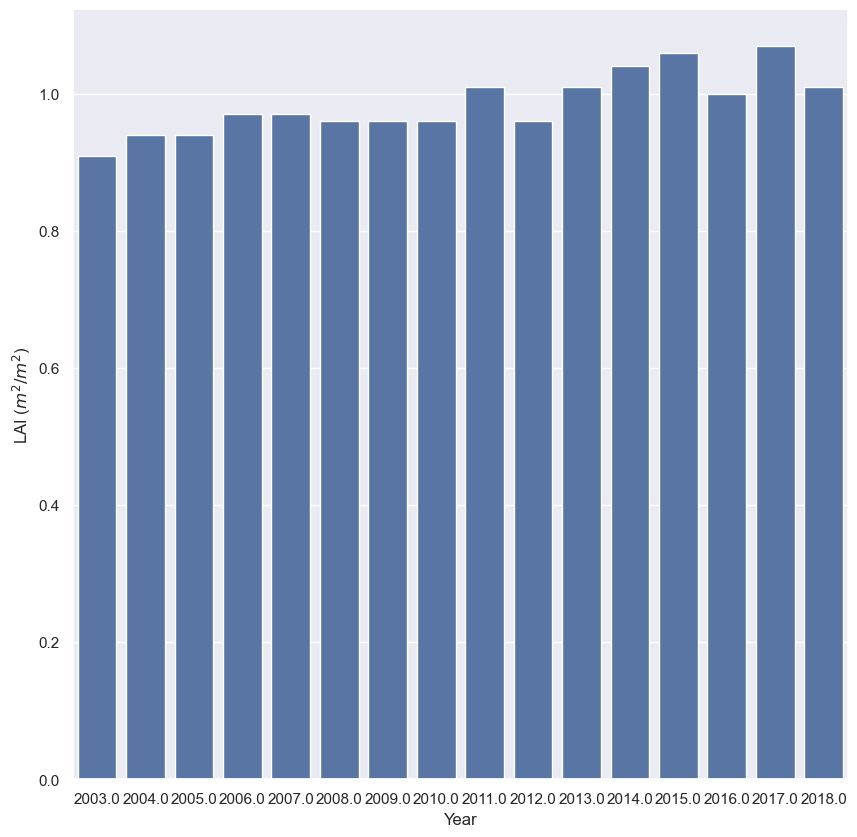

In [21]:
f, ax=plt.subplots(figsize= (10, 10))
sns.barplot(data=df, x= 'Year', y='LAI_India')
plt.gca().set(ylabel='LAI ($m^2/m^2$)', xlabel='Year')

**Performing Simple Linear Regression**

In [24]:
#FOR CHINA
x = np.array(df['LAI_China']).reshape(-1, 1)   #LAI is the cause, (independent variable)
y = np.array(df['LST_China']).reshape(-1, 1)   #dependent variable
df.dropna(inplace=True)                   #Removing missing values
reg = LinearRegression()
reg.fit(x, y)
print(reg.score(x, y))

0.06287502532051603


we got very weak relationship for china.
Only about 6% of the temperature variation can be explained by vegetation in China

In [28]:
#FOR INDIA

x = np.array(df['LAI_India']).reshape(-1, 1)
y = np.array(df['LST_India']).reshape(-1, 1)
df.dropna(inplace=True)
reg = LinearRegression()
reg.fit(x, y)
print(reg.score(x, y))

0.25359358245004393


| R² value | Meaning                    |
| -------- | -------------------------- |
| 0        | No relationship            |
| 0.25     | Weak–moderate relationship |
| 1        | Perfect relationship       |


we got Weak–moderate relationship. About 25% of temperature variation in India can be explained by vegetation cover

**🌱 Real-World Meaning**

**Vegetation has a cooling effect.**
**This effect is stronger in India than in China**
**Other factors (urbanization, climate, geography) also affect temperature**

In [30]:
print('Intercept: \n', reg.intercept_)

Intercept: 
 [311.0893524]


In [32]:
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [[-3.97017365]]


**Perform OLS model (Ordinary Least Squares).**
**It finds the best straight line that fits the data.**
**The line minimizes the total squared error.**

In [36]:
x = np.array(df['LAI_India']).reshape(-1, 1)
y = np.array(df['LST_India']).reshape(-1, 1)

X = sm.add_constant(x)   # VERY IMPORTANT

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     4.757
Date:                Mon, 29 Dec 2025   Prob (F-statistic):             0.0467
Time:                        16:24:41   Log-Likelihood:                -3.3239
No. Observations:                  16   AIC:                             10.65
Df Residuals:                      14   BIC:                             12.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        311.0894      1.796    173.214      0.0

**Check the distribution of the data:**

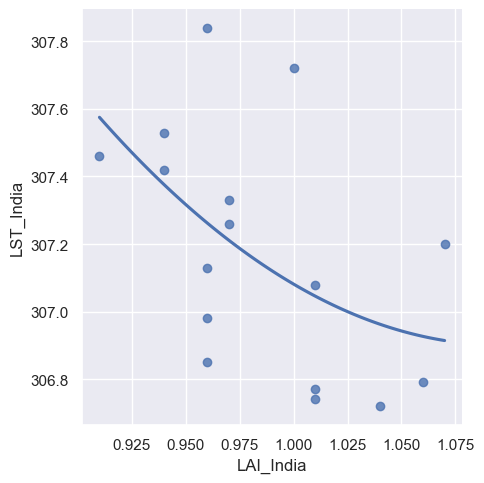

In [37]:
sns.lmplot(x = 'LAI_India', y = 'LST_India', data = df, order=2, ci=None)


The plot shows that the data is negatively skewed

**Check normality using the Shapiro-Wilk test:**

In [38]:
x = (df['LAI_India'])

stat, p=shapiro(x)
print(stat, p)

0.9437443802808783 0.39743370721773386


**Check the distribution of the data**

In [39]:
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)


**Visualize the data using a histogram**

C:\Users\ayush\AppData\Local\Temp\ipykernel_5392\1089577423.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  his = sns.distplot(x)


Text(0, 0.5, 'Frequency')

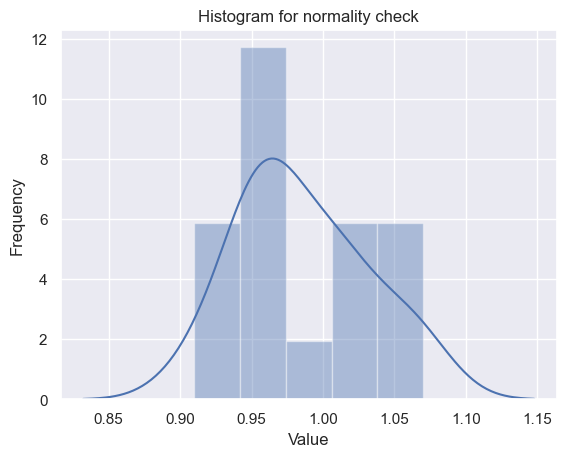

In [41]:
plt.title('Histogram for normality check')
sns.set_style('darkgrid') # set grid style
his = sns.distplot(x)
his.set_xlabel('Value', fontsize=12) # set x label
his.set_ylabel('Frequency', fontsize=12) # set y label


**Visualize the data using a QQ plot (Quantile-Quantile Plot):**

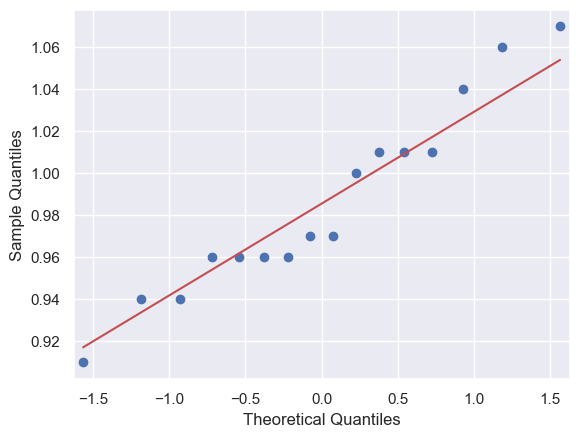

In [42]:
qqplot(x, line='s')
plt.show()

The QQ plot shows a scatter plot of points in a diagonal line.

**Create a barplot of the data:**

<Axes: xlabel='Year'>

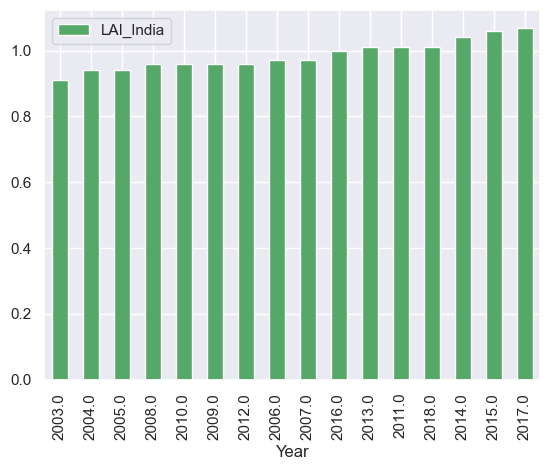

In [44]:
df[['LAI_India', 'Year']].groupby(['Year']).median().sort_values('LAI_India', ascending = True).plot.bar(color='g')


**Plot LST and LAI as a timeline against each other with two y-axes.**

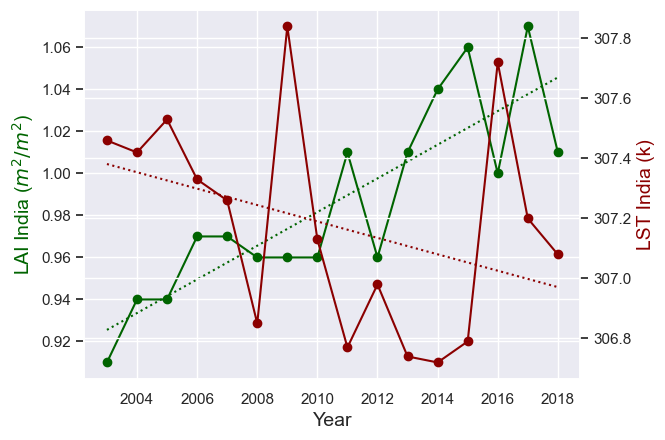

In [47]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()

# make a plot
ax.plot(df.Year, df.LAI_India, color="darkgreen", marker="o")
z = np.polyfit(df.Year, df.LAI_India, 1)
p = np.poly1d(z) # It is ploy1(one)d
plt.plot(df.Year, p(df.Year), 'darkgreen', linestyle= 'dotted')

# set x-axis label
ax.set_xlabel("Year",fontsize=14)

# set y-axis label
ax.set_ylabel("LAI India ($m^2/m^2$)",color="darkgreen",fontsize=14)

#plt.legend()
##############
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(df.Year, df.LST_India,color="darkred",marker="o")
ax2.set_ylabel("LST India (k)",color="darkred",fontsize=14)
z = np.polyfit(df.Year, df.LST_India, 1)
p = np.poly1d(z) # It is ploy1(one)d
plt.plot(df.Year, p(df.Year), 'darkred', linestyle= 'dotted')

#plt.legend()
plt.show()
##### 
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx_India.png',
            format='png',
            dpi=300,
           bbox_inches='tight')

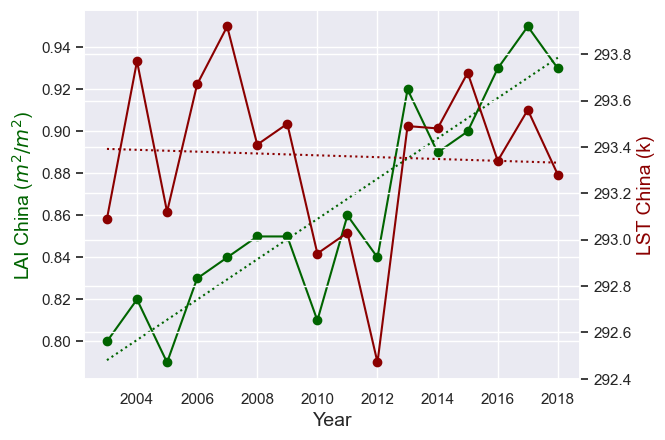

In [48]:
fig,ax = plt.subplots()
# make a plot
ax.plot(df.Year, df.LAI_China, color="darkgreen", marker="o")
z = np.polyfit(df.Year, df.LAI_China, 1)

p = np.poly1d(z) # It is ploy1(one)d
plt.plot(df.Year, p(df.Year), 'darkgreen', linestyle= 'dotted')

# set x-axis label
ax.set_xlabel("Year",fontsize=14)

# set y-axis label
ax.set_ylabel("LAI China ($m^2/m^2$)",color="darkgreen",fontsize=14)

#plt.legend()
##############
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(df.Year, df.LST_China,color="darkred",marker="o")
ax2.set_ylabel("LST China (k)",color="darkred",fontsize=14)
z = np.polyfit(df.Year, df.LST_China, 1)
p = np.poly1d(z) # It is ploy1(one)d
plt.plot(df.Year, p(df.Year), 'darkred', linestyle= 'dotted')
plt.show()
##### 

# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx_China.png',
            format='png',
            dpi=300,
           bbox_inches='tight')


**Detect increasing or decreasing trends in the time series.**

In [49]:
def trendline(index,data, order=1):
    coeffs = np.polyfit(index, list(data), order)
    slope = coeffs[-2]
    return float(slope)

index=df.Year
List=df.LAI_India
#List=df.LST_India
resultent=trendline(index,List)
trendp = resultent*16
print(resultent, trendp) 
# 0.008014705882353073 0.12823529411764917


0.008014705882353129 0.12823529411765006
